# Machine Learning Project with the Arcene Data set
https://archive.ics.uci.edu/ml/datasets/Arcene

This data was collected on mass spectrometry proteomics (spectra)from 2 prostate and 1 ovarian cancer data sets. There are additional control/healthy patients. **900 cases and 10,000 features** means I need to do feature selection / dimensionality reduction!!! 7000 features are real and 3000 are 'probes' in order to assess the ability of the model to filter out unimportant information.

The data is already split into training, testing and validation sets so splitting the data does not need to be done here.

1. Import modules and data

2. Dimensionality reduction/ feature selection: 
    - Info here: https://academic.oup.com/bioinformatics/article/23/19/2507/185254/A-review-of-feature-selection-techniques-in
    - Follow sci kit learn's feature selection suggestions http://scikit-learn.org/stable/modules/feature_selection.html#feature-selection
    
    - Try PCA for dimensionality reduction
    - Rule of thumb is ~10x # of cases per feature? So 90 features?
    - Even 90 features is a lot. Play around with more things.

3. Logistic Regression

5. k-Nearest Neighbor Classification

5. k-Nearest Neighbor Classification with Cross Validation (errors)

6. SVM

7. LinearSVM (supposed to be best for this kind of data - http://scikit-learn.org/stable/tutorial/machine_learning_map/) 

8. Compare performance against null error rate (simple test not only test)

9. Write Concluding Statement

## 1. Import Modules and Data

In [3]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#line to make our figures show up in notebook
%matplotlib inline

In [4]:
Arc_train=pd.read_csv('arcene_train.csv', header=None)
Arc_train.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,71,0,95,0,538,404,20,0,0,...,255,570,86,0,36,0,80,0,0,524
1,0,41,82,165,60,554,379,0,71,0,...,213,605,69,7,473,0,57,0,284,423
2,0,0,1,40,0,451,402,0,0,0,...,235,593,28,0,24,0,90,0,34,508
3,0,56,44,275,14,511,470,0,0,0,...,91,600,0,26,86,0,102,0,0,469
4,105,0,141,348,0,268,329,0,0,1,...,813,0,0,0,0,190,301,0,0,354


In [8]:
Arc_valid=pd.read_csv('arcene_valid.csv', header=None)
Arc_valid.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,156,138,2,635,444,0,1,0,...,88,692,42,0,50,67,87,0,0,465
1,0,7,0,7,0,251,0,0,22,222,...,698,673,0,0,18,201,317,0,34,199
2,0,32,0,470,53,493,0,0,140,147,...,267,461,20,34,165,225,53,0,47,219
3,0,77,0,202,0,432,472,0,60,0,...,181,555,13,0,488,0,71,0,177,487
4,0,34,102,522,2,474,473,0,39,0,...,114,630,0,29,192,0,74,0,5,416


In [9]:
Arc_train_Labels=pd.read_csv('arcene_train_labels.csv', header=None)
Arc_train_Labels.head()

,0
0,1
1,0
2,1
3,1
4,0


In [10]:
Arc_valid_Labels=pd.read_csv('arcene_valid_labels.csv', header=None)
Arc_valid_Labels.head()

,0
0,0
1,0
2,0
3,1
4,1


In [11]:
X_train_PCA=Arc_train.as_matrix()
y_train_PCA=Arc_train_Labels.as_matrix()
target_names = np.array(['pos', 'neg'])

In [12]:
X_test_PCA=Arc_valid.as_matrix()
y_test_PCA=Arc_valid_Labels.as_matrix()

In [13]:
X_train=Arc_train
y_train=Arc_train_Labels
X_test=Arc_valid
y_test=Arc_valid_Labels

## 2. Visualize Data / think about dimensionality reduction with 3D PCA analysis
code from: http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py and http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

### 3D PCA

Automatically created module for IPython interactive environment
explained variance ratio (first two components): [ 0.44859537  0.22397886  0.05459793]
explained variance ratio (first two components): [ 0.4004128   0.24027798  0.06725474]


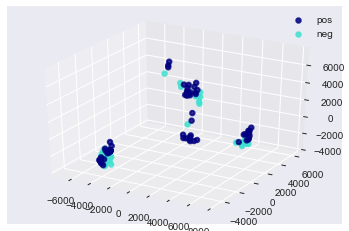

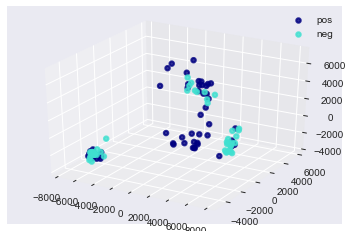

In [14]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=3)
X_r = pca.fit(X_train_PCA).transform(X_train_PCA)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_r[np.where(y_train_PCA == i), 0], 
               X_r[np.where(y_train_PCA == i), 2],
               X_r[np.where(y_train_PCA == i), 1],
               zdir="x",
                color=color, alpha=.8, 
                lw=lw,
                label=target_name)
ax.legend(loc='best', shadow=False, scatterpoints=1)
#ax.title('PCA of Arcene training dataset')

X_r2=pca.fit(X_test_PCA).transform(X_test_PCA)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_r2[np.where(y_test_PCA == i), 0], 
               X_r2[np.where(y_test_PCA == i), 2],
               X_r2[np.where(y_test_PCA == i), 1],
               zdir="x",
                color=color, alpha=.8, 
                lw=lw,
                label=target_name)
ax.legend(loc='best', shadow=False, scatterpoints=1)
#ax.title('PCA of Arcene validation dataset')

### 2D PCA

explained variance ratio (first two components): [ 0.44859537  0.22397886]
explained variance ratio (first two components): [ 0.4004128   0.24027798]


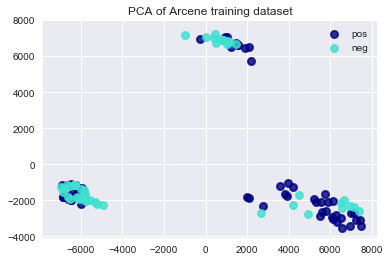

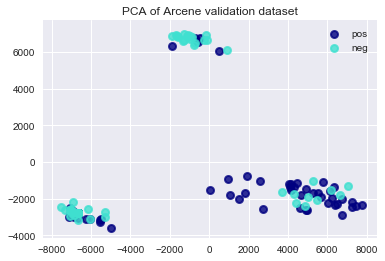

In [15]:
pca = PCA(n_components=2)
X_r = pca.fit(X_train_PCA).transform(X_train_PCA)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure()
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[np.where(y_train_PCA == i), 0], 
               X_r[np.where(y_train_PCA == i), 1],
                color=color, alpha=.8, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Arcene training dataset')

X_r2=pca.fit(X_test_PCA).transform(X_test_PCA)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

fig = plt.figure()
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r2[np.where(y_test_PCA == i), 0], 
               X_r2[np.where(y_test_PCA == i), 1],
                color=color, alpha=.8, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Arcene validation dataset')

PCA analysis shows three clusters. Probably they are from the 3 different studies that were combined together. I can't see much separation between pos and neg in clusters. Maybe come back to this later.

## 3. Logistic Regression
most machine learning functions are in the module **scikit-learn** which is called sklearn (don't need to import separately)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

/Users/paulson/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

/Users/paulson/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pred=logreg.predict(X_test)

In [19]:
metrics.accuracy_score(y_test, y_pred)

0.83999999999999997

In [20]:
metrics.confusion_matrix(y_test, y_pred)

array([[50,  6],
       [10, 34]])

In [21]:
logreg.intercept_ #bias 

array([ -1.44308168e-07])

In [22]:
logreg.coef_

array([[ -9.90853286e-05,   3.30030865e-04,   2.47323356e-05, ...,
         -1.41550462e-05,  -8.70091907e-04,  -2.56025766e-04]])

## 4. k-Nearest Neighbor Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

/Users/paulson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
y_pred_knn=knn.predict(X_test)

In [26]:
metrics.accuracy_score(y_test, y_pred_knn)

0.81999999999999995

## 5. k-Nearest Neighbor Classifier with Cross Validation (error)

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
knn_cv=KNeighborsClassifier(n_neighbors=50)

In [367]:
#cv_scores=cross_val_score(knn_cv, X_train, y_train, cv=3) <-- throws error

???

## 6. SVM

In [29]:
from sklearn import svm

In [30]:
sv=svm.SVC(kernel='linear', C=1)
sv.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
y_pred_sv=sv.predict(X_test)

In [32]:
metrics.accuracy_score(y_test, y_pred_sv)

0.82999999999999996

## 7. LinearSVM

In [33]:
lsv=svm.LinearSVC(C=1)
lsv.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [34]:
y_pred_lsv=lsv.predict(X_test)

In [35]:
metrics.accuracy_score(y_test, y_pred_lsv)

0.82999999999999996

In [36]:
metrics.confusion_matrix(y_test, y_pred_lsv)

array([[50,  6],
       [11, 33]])

## 8. Try recursive feature elimination
(for 10k features it's taking a really long time! Had to stop after an hour)

In [37]:
from sklearn.feature_selection import RFE

In [52]:
# this takes a long time; don't run the code unless you want to wait

selector=RFE(lsv, 50, step=1)
selector=selector.fit(X_new,y_train)
y_pred_selected=selector.predict(X_new_test)
metrics.accuracy_score(y_test, y_pred_selected)

0.80000000000000004

In [57]:
X_new_transform=selector.transform(X_new)
X_new_transform

array([[466,   0,   0, ...,  44, 451,   0],
       [395,   0,  18, ...,  67, 383,   0],
       [483,   0,  47, ..., 104, 465,   0],
       ..., 
       [467,   0,  24, ...,  14, 449,   0],
       [420,   0,  24, ...,  83, 392,   0],
       [  0, 177, 106, ...,  86,   0, 414]])

## 9. Try feature selection from model

In [50]:
from sklearn.feature_selection import SelectFromModel
model=SelectFromModel(lsv, prefit=True)
X_new=model.transform(X_train)
X_new.shape
X_new_test=model.transform(X_test)
X_new_test.shape

(100, 3719)

Cuts features down to about 3500 from 10k. A good start, does this new data train a model as well as the full dataset?

In [41]:
lsv_new=svm.LinearSVC(C=1)
lsv_new.fit(X_new, y_test)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [42]:
y_pred_lsv_new=lsv_new.predict(X_new)

In [43]:
metrics.accuracy_score(y_test, y_pred_lsv)

0.82999999999999996

Yay, still good!

## 10. Compare to null error rate

In [45]:
y_test.mean()

0    0.44
dtype: float64

Null error rate: 1-.44=.56

Performance: .82-1

Much higher than null error rate.

## 11. Conclusion statement

I played around with a dataset that has a super high number of features with much lower number of samples - in preparation for working with RNAseq data for my main project. 

I first needed a new way to visualize the data since traditional feature comparison methods would not work with 10k features. For this I tried a 3D (and 2D) PCA. Three main clusters emerged, which I suspect corresponded to the three studies that the data was pooled from. There was, however, no obvious separation between positive and negative samples, and only the most basic corellation of PCA plots from the test and validation sets. 

This, in turn, led me to be very surprised when the LinearSVM model had 100% accuracy. 

In the future, I will look at other methods of visualizing high dimensional data, as well as methods to reduce dimensionality (although it was not a problem here to use the whole dataset). A second question I have is how to extract information from the model. In general the features that are most influential in the model would be of import to researchers because if each feature corresponds to a gene, I want to know which genes in particular are helpful in determining the difference between my two classes in order to generate new hypotheses. 

In order to determine which features are most important for the distinction between two classes, I will look at clustering models and maybe generative models.

Presumably my model will not be perfect, so I will also look at parameter tuning. However, I think the majority of the work might fall in the dimensionality reduction and feature selection part of learning. 